In [1]:
import requests
import zipfile
import io
import pandas as pd
import os

In [29]:
world = pd.read_csv('../data/world_bank_data/API_USA_DS2_en_csv_v2_10605.csv', skiprows=4)
meta = pd.read_csv('../data/world_bank_data/Metadata_Indicator_API_USA_DS2_en_csv_v2_10605.csv')

world_joined = pd.merge(world, meta, left_on='Indicator Code', right_on='INDICATOR_CODE')
world_joined

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2020,2021,2022,2023,Unnamed: 68,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,United States,USA,"Intentional homicides (per 100,000 people)",VC.IHR.PSRC.P5,NaN,NaN,NaN,NaN,NaN,NaN,...,6.420751e+00,6.807466e+00,NaN,NaN,NaN,VC.IHR.PSRC.P5,"Intentional homicides (per 100,000 people)",Intentional homicides are estimates of unlawfu...,UN Office on Drugs and Crime's International H...,NaN
1,United States,USA,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.715000e+06,5.730000e+05,6.750000e+05,202000.0,NaN,VC.IDP.NWDS,"Internally displaced persons, new displacement...",Internally displaced persons are defined accor...,The Internal Displacement Monitoring Centre (h...,NaN
2,United States,USA,"Voice and Accountability: Percentile Rank, Upp...",VA.PER.RNK.UPPER,NaN,NaN,NaN,NaN,NaN,NaN,...,8.260870e+01,8.599034e+01,8.212560e+01,NaN,NaN,VA.PER.RNK.UPPER,"Voice and Accountability: Percentile Rank, Upp...",Voice and Accountability captures perceptions ...,"Detailed documentation of the WGI, interactive...",NaN
3,United States,USA,Voice and Accountability: Estimate,VA.EST,NaN,NaN,NaN,NaN,NaN,NaN,...,8.558657e-01,8.781467e-01,8.451219e-01,NaN,NaN,VA.EST,Voice and Accountability: Estimate,Voice and Accountability captures perceptions ...,"Detailed documentation of the WGI, interactive...",NaN
4,United States,USA,High-technology exports (current US$),TX.VAL.TECH.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.415386e+11,1.692173e+11,1.664356e+11,NaN,NaN,TX.VAL.TECH.CD,High-technology exports (current US$),High-technology exports are products with high...,"United Nations, Comtrade database through the ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,United States,USA,Land area (sq. km),AG.LND.TOTL.K2,NaN,9.158960e+06,9.158960e+06,9.158960e+06,9.158960e+06,9.158960e+06,...,9.147420e+06,9.147420e+06,NaN,NaN,NaN,AG.LND.TOTL.K2,Land area (sq. km),"Land area is a country's total area, excluding...","Food and Agriculture Organization, electronic ...",NaN
1492,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,3.097950e+06,3.097950e+06,NaN,NaN,NaN,AG.LND.FRST.K2,Forest area (sq. km),Forest area is land under natural or planted s...,"Food and Agriculture Organization, electronic ...",NaN
1493,United States,USA,Rural land area where elevation is below 5 met...,AG.LND.EL5M.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,AG.LND.EL5M.RU.ZS,Rural land area where elevation is below 5 met...,Rural land area below 5m is the percentage of ...,Center for International Earth Science Informa...,NaN
1494,United States,USA,Arable land (% of land area),AG.LND.ARBL.ZS,NaN,1.972167e+01,1.933571e+01,1.960637e+01,1.943081e+01,1.932534e+01,...,1.724386e+01,1.724386e+01,NaN,NaN,NaN,AG.LND.ARBL.ZS,Arable land (% of land area),Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ...",NaN


       Country Name Country Code  \
0     United States          USA   
1     United States          USA   
2     United States          USA   
3     United States          USA   
4     United States          USA   
...             ...          ...   
1491  United States          USA   
1492  United States          USA   
1493  United States          USA   
1494  United States          USA   
1495  United States          USA   

                                         Indicator Name     Indicator Code  \
0            Intentional homicides (per 100,000 people)     VC.IHR.PSRC.P5   
1     Internally displaced persons, new displacement...        VC.IDP.NWDS   
2     Voice and Accountability: Percentile Rank, Upp...   VA.PER.RNK.UPPER   
3                    Voice and Accountability: Estimate             VA.EST   
4                 High-technology exports (current US$)     TX.VAL.TECH.CD   
...                                                 ...                ...   
1491                 

In [28]:
print("World DataFrame columns:", world.columns)
print("Meta DataFrame columns:", meta.columns)

World DataFrame columns: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Unnamed: 68'],
      dtype='object')
Meta DataFrame columns: Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION', 'Unnamed: 4'],
      dtype='object')


In [30]:
threshold = 0.5 * len(world_joined) 
world_joined = world_joined.dropna(axis=1, thresh=threshold)

In [31]:
world_joined = world_joined.loc[:, ~world_joined.columns.str.contains('^Unnamed')]


In [32]:
world_joined = world_joined.dropna()


In [33]:
world_joined

,Country Name,Country Code,Indicator Name,Indicator Code,1996,1998,1999,2000,2001,2002,...,2016,2017,2018,2019,2020,2021,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
10,United States,USA,Export unit value index (2015 = 100),TX.UVI.MRCH.XD.WD,9.690000e+01,8.720000e+01,8.560000e+01,8.070000e+01,8.010000e+01,7.930000e+01,...,9.680000e+01,9.910000e+01,1.024000e+02,1.016000e+02,9.880000e+01,1.125000e+02,TX.UVI.MRCH.XD.WD,Export unit value index (2015 = 100),Export unit value indices come from UNCTAD's t...,United Nations Conference on Trade and Develop...
11,United States,USA,Travel services (% of commercial service imports),TM.VAL.TRVL.ZS.WT,3.565606e+01,3.517733e+01,3.224877e+01,3.109010e+01,2.927930e+01,2.756181e+01,...,2.220482e+01,2.212464e+01,2.317716e+01,2.318431e+01,7.772315e+00,1.083584e+01,TM.VAL.TRVL.ZS.WT,Travel services (% of commercial service imports),Travel services (% of commercial service impor...,"International Monetary Fund, Balance of Paymen..."
12,United States,USA,Import value index (2015 = 100),TM.VAL.MRCH.XD.WD,3.550402e+01,4.078748e+01,4.575819e+01,5.439033e+01,5.092987e+01,5.183904e+01,...,9.718623e+01,1.040243e+02,1.129106e+02,1.108903e+02,1.039576e+02,1.267789e+02,TM.VAL.MRCH.XD.WD,Import value index (2015 = 100),Import value indexes are the current value of ...,United Nations Conference on Trade and Develop...
15,United States,USA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,8.220250e+11,9.443530e+11,1.059440e+12,1.259300e+12,1.179180e+12,1.200230e+12,...,2.250154e+12,2.408476e+12,2.614221e+12,2.567445e+12,2.406932e+12,2.935314e+12,TM.VAL.MRCH.CD.WT,Merchandise imports (current US$),Merchandise imports show the c.i.f. value of g...,World Trade Organization.
16,United States,USA,Insurance and financial services (% of commerc...,TM.VAL.INSF.ZS.WT,5.959414e+00,6.949284e+00,1.198536e+01,1.343472e+01,1.581397e+01,1.734493e+01,...,1.748093e+01,1.711358e+01,1.569498e+01,1.678874e+01,2.337366e+01,2.033276e+01,TM.VAL.INSF.ZS.WT,Insurance and financial services (% of commerc...,Insurance and financial services cover freight...,"International Monetary Fund, Balance of Paymen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,United States,USA,Crop production index (2014-2016 = 100),AG.PRD.CROP.XD,7.456000e+01,7.755000e+01,7.780000e+01,7.988000e+01,7.773000e+01,7.457000e+01,...,1.067100e+02,1.005300e+02,1.002100e+02,9.368000e+01,9.843000e+01,1.010000e+02,AG.PRD.CROP.XD,Crop production index (2014-2016 = 100),Crop production index shows agricultural produ...,"Food and Agriculture Organization, electronic ..."
1491,United States,USA,Land area (sq. km),AG.LND.TOTL.K2,9.158960e+06,9.158960e+06,9.158960e+06,9.161920e+06,9.161920e+06,9.161920e+06,...,9.147420e+06,9.147420e+06,9.147420e+06,9.147420e+06,9.147420e+06,9.147420e+06,AG.LND.TOTL.K2,Land area (sq. km),"Land area is a country's total area, excluding...","Food and Agriculture Organization, electronic ..."
1492,United States,USA,Forest area (sq. km),AG.LND.FRST.K2,3.031016e+06,3.033188e+06,3.034274e+06,3.035360e+06,3.040544e+06,3.045728e+06,...,3.100950e+06,3.097950e+06,3.097950e+06,3.097950e+06,3.097950e+06,3.097950e+06,AG.LND.FRST.K2,Forest area (sq. km),Forest area is land under natural or planted s...,"Food and Agriculture Organization, electronic ..."
1494,United States,USA,Arable land (% of land area),AG.LND.ARBL.ZS,1.954436e+01,1.930154e+01,1.914715e+01,1.914097e+01,1.914446e+01,1.887999e+01,...,1.718419e+01,1.724386e+01,1.724386e+01,1.724386e+01,1.724386e+01,1.724386e+01,AG.LND.ARBL.ZS,Arable land (% of land area),Arable land includes land defined by the FAO a...,"Food and Agriculture Organization, electronic ..."


In [46]:
income = pd.read_excel('../data/us_income_data.xlsx', skiprows=2)
income.columns = income.columns.map(str)
income_df = income.loc[:, ~income.columns.str.contains('^Unnamed')]
income_df = income_df.drop([0,53,54,55,56], axis=0)
income_df = income_df.rename(columns={
    "State": "State",         
    '1990\\1\\': "1990",          
    '2000\\2\\': "2000",
    "2005": "2005",
    "2010": "2010",
    "2015": "2015",
    "2020": "2020",
    "2021": "2021"
})
income_df

,State,1990,2000,2005,2010,2015,2016,2017,2018,2019,2021
1,United States,63600.0,68500.0,64300.0,62300.0,63800.0,65100.0,66700.0,66800.0,69600.0,69700.0
2,Alabama,49900.0,55700.0,51300.0,50400.0,51200.0,52200.0,53200.0,53800.0,54800.0,53900.0
3,Alaska,87600.0,84100.0,78200.0,80400.0,83900.0,86300.0,80900.0,80200.0,80000.0,77800.0
4,Arizona,58300.0,66200.0,61600.0,58300.0,58900.0,60500.0,62500.0,63900.0,65800.0,69100.0
5,Arkansas,44700.0,52500.0,48700.0,47700.0,48000.0,50100.0,50700.0,50800.0,51900.0,52500.0
6,California,75700.0,77500.0,74600.0,71900.0,73800.0,76500.0,79400.0,81200.0,85200.0,84900.0
7,Colorado,63800.0,77000.0,70400.0,67300.0,73100.0,74200.0,76400.0,77600.0,81700.0,82300.0
8,Connecticut,88300.0,88000.0,84800.0,79700.0,81600.0,82900.0,82000.0,82400.0,83500.0,83800.0
9,Delaware,73800.0,77300.0,73000.0,69500.0,70100.0,69700.0,69500.0,69900.0,74400.0,71100.0
10,District of Columbia,65000.0,65500.0,65700.0,75800.0,86500.0,85200.0,91000.0,91900.0,97800.0,90100.0


In [50]:
! pip install scipy matplotlib seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 1.5 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.6 MB/s eta 0:00:0000:0100:01


In [51]:
import sqlite3
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from SQLite database
db_path = '../data/analysis.db'
with sqlite3.connect(db_path) as conn:
    # Identify the main table name
    table_names = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
    table_name = table_names.iloc[0, 0]
    # Load the data from the main table
    data_df = pd.read_sql_query(f"SELECT * FROM {table_name};", conn)

# Filter for relevant columns (income, deforestation, and CO₂ for the years 2005, 2010, and 2015)
selected_columns = [
    'State', '2005', '2010', '2015',  # Income columns
    'tc_loss_ha_2005', 'tc_loss_ha_2010', 'tc_loss_ha_2015',  # Deforestation columns
    'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e'  # CO₂ emissions columns
]
filtered_df = data_df[selected_columns].drop_duplicates()

# Calculate correlations and conduct Pearson tests for income vs. deforestation and income vs. CO₂
correlations = {}
tests = {}
for year in ['2005', '2010', '2015']:
    # Correlations
    correlations[year] = {
        'Income-Deforestation': filtered_df[year].corr(filtered_df[f'tc_loss_ha_{year}']),
        'Income-CO2': filtered_df[year].corr(filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    }
    
    # Pearson Correlation Tests
    tests[year] = {
        'Income-Deforestation': pearsonr(filtered_df[year], filtered_df[f'tc_loss_ha_{year}']),
        'Income-CO2': pearsonr(filtered_df[year], filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    }

# Display Results
print("Correlation Analysis Results:")
for year, result in correlations.items():
    print(f"\nYear: {year}")
    print(f"Income-Deforestation Correlation: {result['Income-Deforestation']:.3f}")
    print(f"Income-CO2 Correlation: {result['Income-CO2']:.3f}")

print("\nPearson Correlation Test Results:")
for year, result in tests.items():
    print(f"\nYear: {year}")
    print(f"Income-Deforestation Correlation: {result['Income-Deforestation'][0]:.3f}, P-value: {result['Income-Deforestation'][1]:.5f}")
    print(f"Income-CO2 Correlation: {result['Income-CO2'][0]:.3f}, P-value: {result['Income-CO2'][1]:.5f}")


Correlation Analysis Results:

Year: 2005
Income-Deforestation Correlation: 0.134
Income-CO2 Correlation: -0.156

Year: 2010
Income-Deforestation Correlation: 0.141
Income-CO2 Correlation: -0.213

Year: 2015
Income-Deforestation Correlation: 0.253
Income-CO2 Correlation: -0.102

Pearson Correlation Test Results:

Year: 2005
Income-Deforestation Correlation: 0.134, P-value: 0.00114
Income-CO2 Correlation: -0.156, P-value: 0.00015

Year: 2010
Income-Deforestation Correlation: 0.141, P-value: 0.00063
Income-CO2 Correlation: -0.213, P-value: 0.00000

Year: 2015
Income-Deforestation Correlation: 0.253, P-value: 0.00000
Income-CO2 Correlation: -0.102, P-value: 0.01325


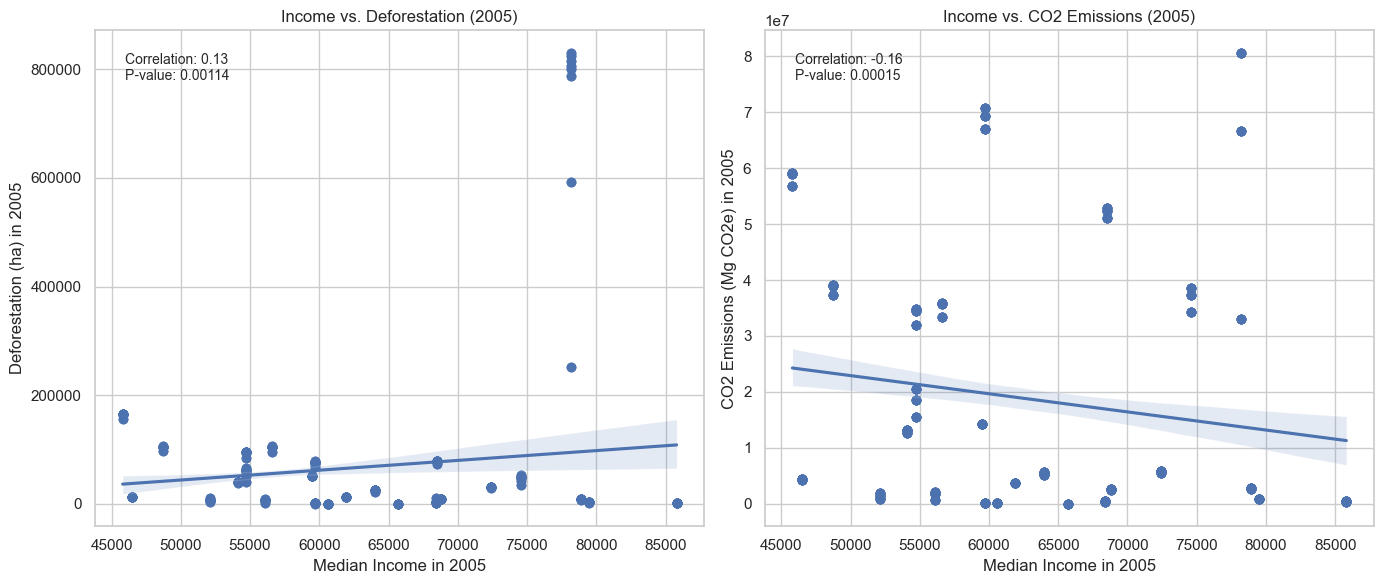

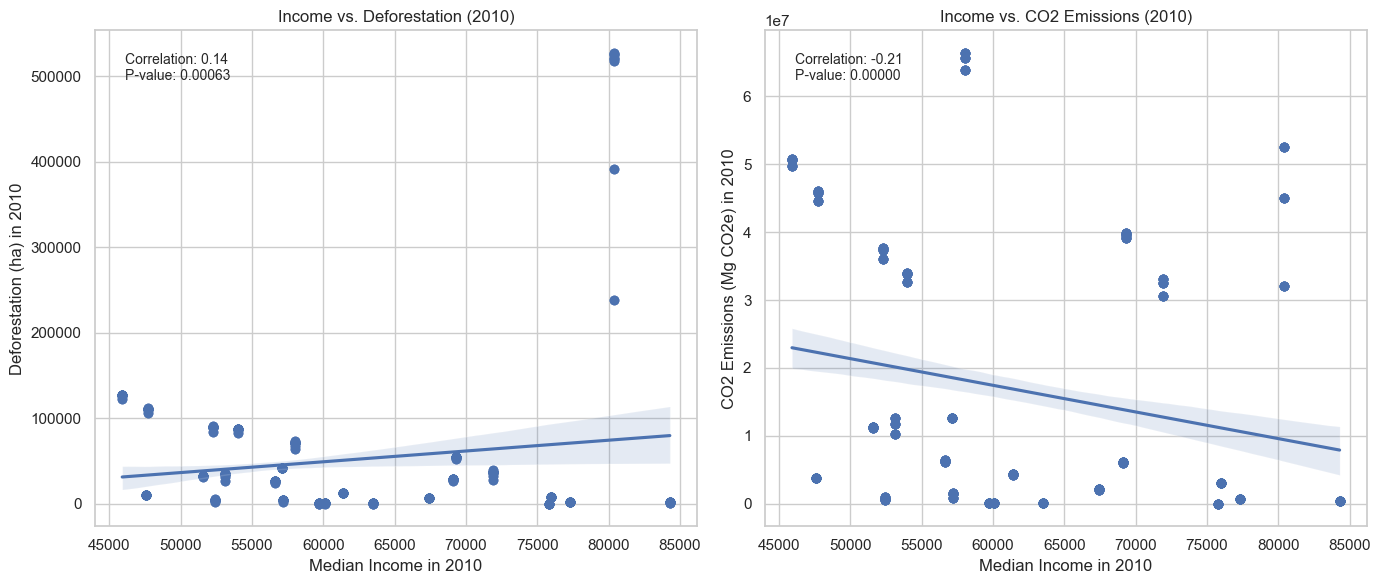

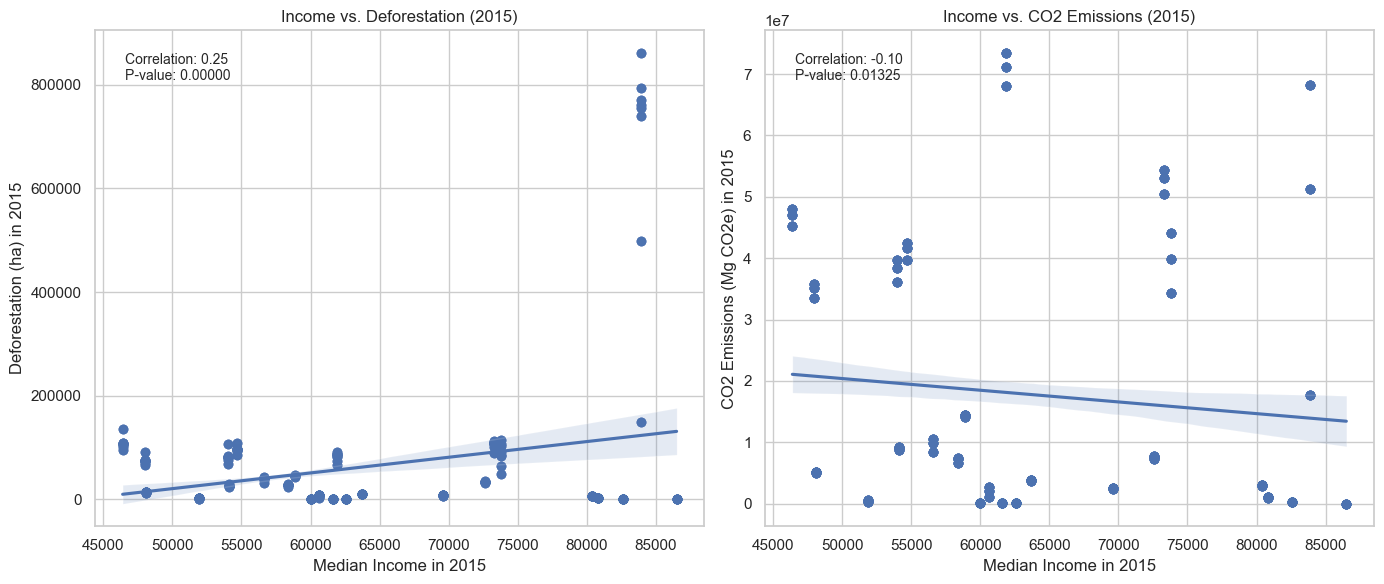

In [52]:
# Filter for relevant columns (income, deforestation, and CO₂ for the years 2005, 2010, and 2015)
selected_columns = [
    'State', '2005', '2010', '2015',  # Income columns
    'tc_loss_ha_2005', 'tc_loss_ha_2010', 'tc_loss_ha_2015',  # Deforestation columns
    'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e'  # CO₂ emissions columns
]
filtered_df = data_df[selected_columns].drop_duplicates()

# Define years for plotting
years = ['2005', '2010', '2015']

# Set up the plot style
sns.set(style="whitegrid")

# Plot income vs deforestation and income vs CO2 for each year
for year in years:
    plt.figure(figsize=(14, 6))

    # Scatter plot for Income vs. Deforestation
    plt.subplot(1, 2, 1)
    sns.regplot(x=filtered_df[year], y=filtered_df[f'tc_loss_ha_{year}'])
    plt.xlabel(f'Median Income in {year}')
    plt.ylabel(f'Deforestation (ha) in {year}')
    plt.title(f'Income vs. Deforestation ({year})')
    corr_income_deforestation, p_value_deforestation = pearsonr(filtered_df[year], filtered_df[f'tc_loss_ha_{year}'])
    plt.annotate(f"Correlation: {corr_income_deforestation:.2f}\nP-value: {p_value_deforestation:.5f}", 
                 xy=(0.05, 0.9), xycoords="axes fraction", fontsize=10)

    # Scatter plot for Income vs. CO2
    plt.subplot(1, 2, 2)
    sns.regplot(x=filtered_df[year], y=filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    plt.xlabel(f'Median Income in {year}')
    plt.ylabel(f'CO2 Emissions (Mg CO2e) in {year}')
    plt.title(f'Income vs. CO2 Emissions ({year})')
    corr_income_co2, p_value_co2 = pearsonr(filtered_df[year], filtered_df[f'gfw_forest_carbon_gross_emissions_{year}__Mg_CO2e'])
    plt.annotate(f"Correlation: {corr_income_co2:.2f}\nP-value: {p_value_co2:.5f}", 
                 xy=(0.05, 0.9), xycoords="axes fraction", fontsize=10)

    plt.tight_layout()
    plt.show()

In [62]:
! pip install nbformat == 4.2.0

zsh:1: = not found


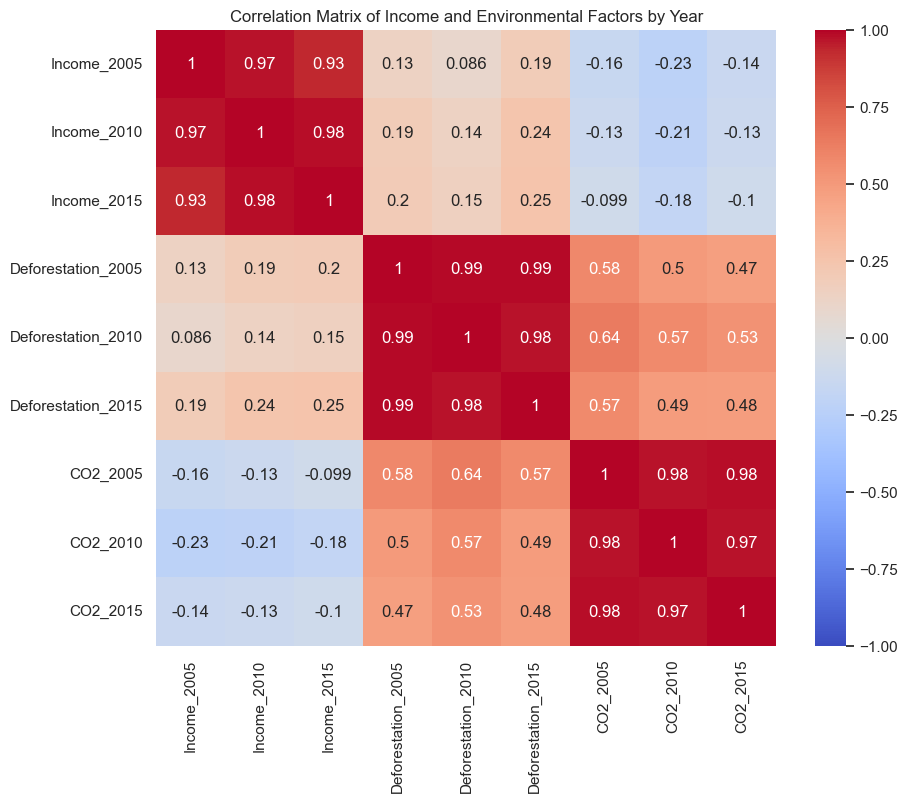

<Figure size 1400x600 with 0 Axes>

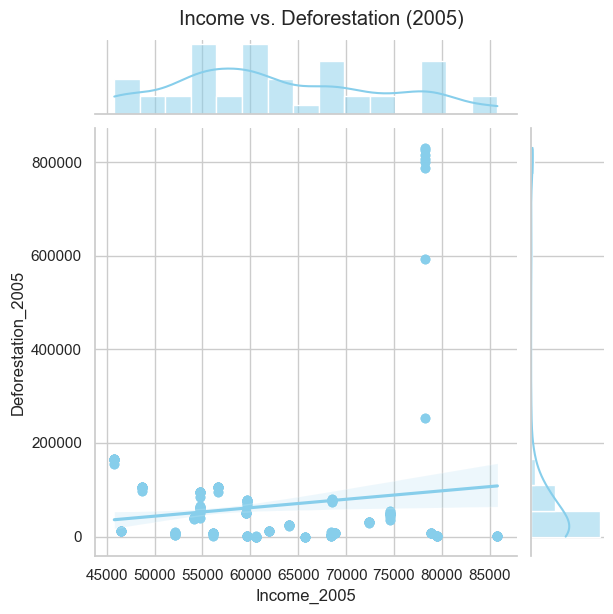

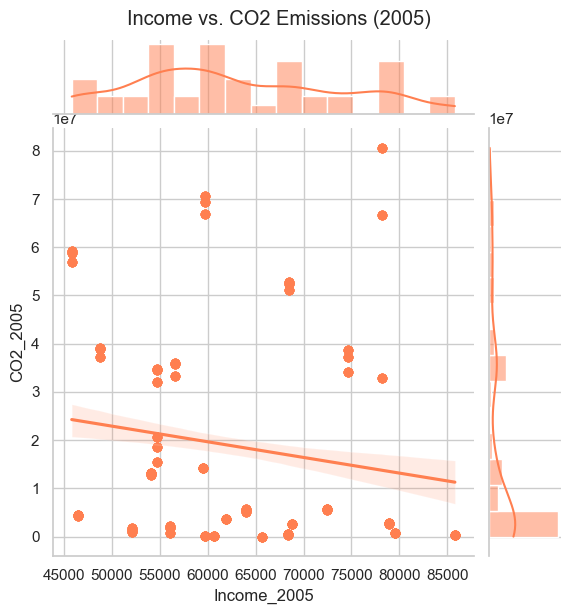

<Figure size 1400x600 with 0 Axes>

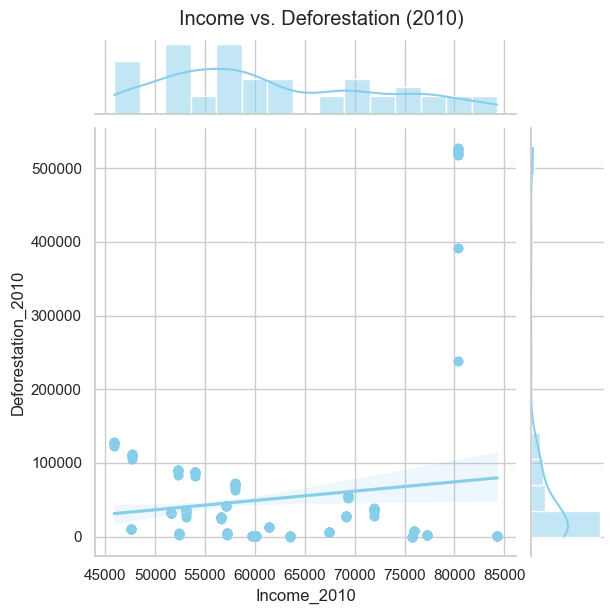

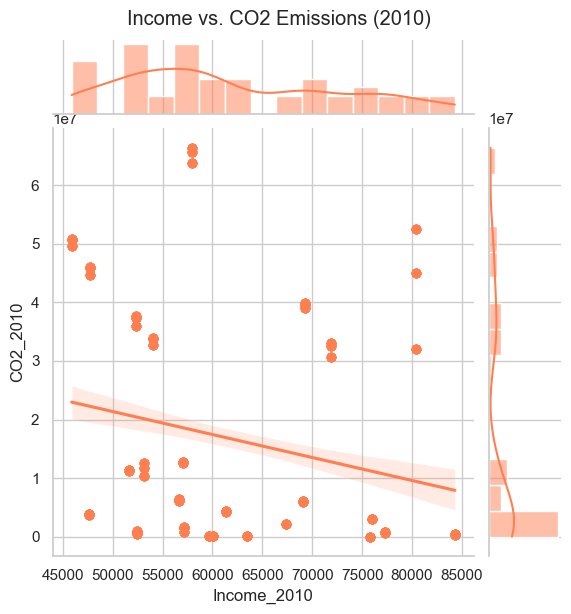

<Figure size 1400x600 with 0 Axes>

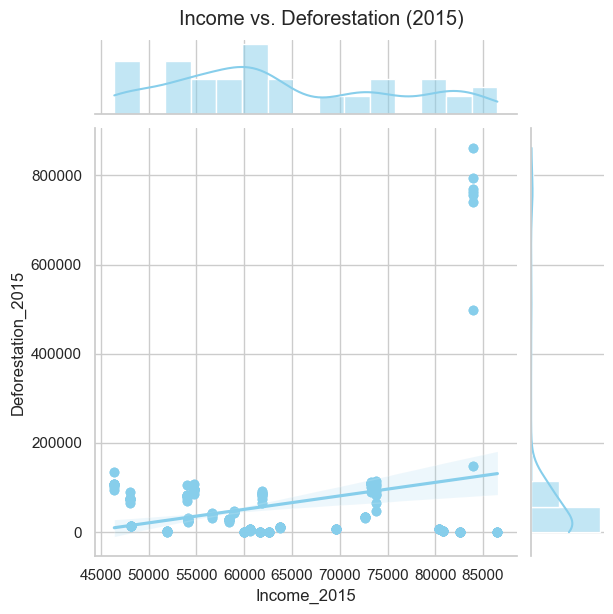

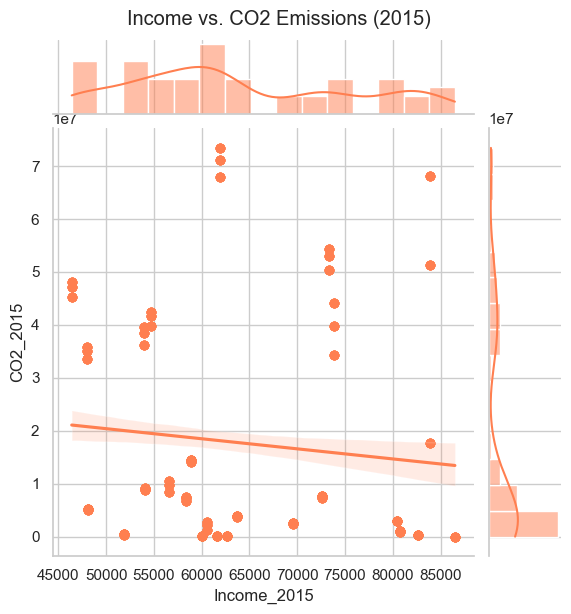

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from scipy.stats import pearsonr

# Load data from SQLite database
db_path = '../data/analysis.db'
with sqlite3.connect(db_path) as conn:
    data_df = pd.read_sql_query("SELECT * FROM US_Analysis;", conn)

# Select relevant columns, excluding "State"
selected_columns = [
    '2005', '2010', '2015',  # Median income columns
    'tc_loss_ha_2005', 'tc_loss_ha_2010', 'tc_loss_ha_2015',  # Deforestation data
    'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e', 
    'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e'  # CO₂ emissions data
]
filtered_df = data_df[selected_columns].drop_duplicates()

# Rename columns for clarity in the heatmap and plots
filtered_df = filtered_df.rename(columns={
    '2005': 'Income_2005', '2010': 'Income_2010', '2015': 'Income_2015',
    'tc_loss_ha_2005': 'Deforestation_2005', 'tc_loss_ha_2010': 'Deforestation_2010', 'tc_loss_ha_2015': 'Deforestation_2015',
    'gfw_forest_carbon_gross_emissions_2005__Mg_CO2e': 'CO2_2005',
    'gfw_forest_carbon_gross_emissions_2010__Mg_CO2e': 'CO2_2010',
    'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e': 'CO2_2015'
})

# Heatmap of Correlation Matrix (Exclude the State column to avoid non-numeric data)
plt.figure(figsize=(10, 8))
correlation_matrix = filtered_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Income and Environmental Factors by Year')
plt.show()

# Joint Plot for Income vs. Deforestation and Income vs. CO2
years = ['2005', '2010', '2015']
for year in years:
    plt.figure(figsize=(14, 6))
    
    # Joint Plot for Income vs Deforestation
    sns.jointplot(
        x=filtered_df[f'Income_{year}'], y=filtered_df[f'Deforestation_{year}'],
        kind='reg', height=6, color='skyblue',
        marginal_kws=dict(bins=15, fill=True)
    )
    plt.suptitle(f'Income vs. Deforestation ({year})', y=1.02)
    
    # Joint Plot for Income vs CO2
    sns.jointplot(
        x=filtered_df[f'Income_{year}'], y=filtered_df[f'CO2_{year}'],
        kind='reg', height=6, color='coral',
        marginal_kws=dict(bins=15, fill=True)
    )
    plt.suptitle(f'Income vs. CO2 Emissions ({year})', y=1.02)
    
plt.show()


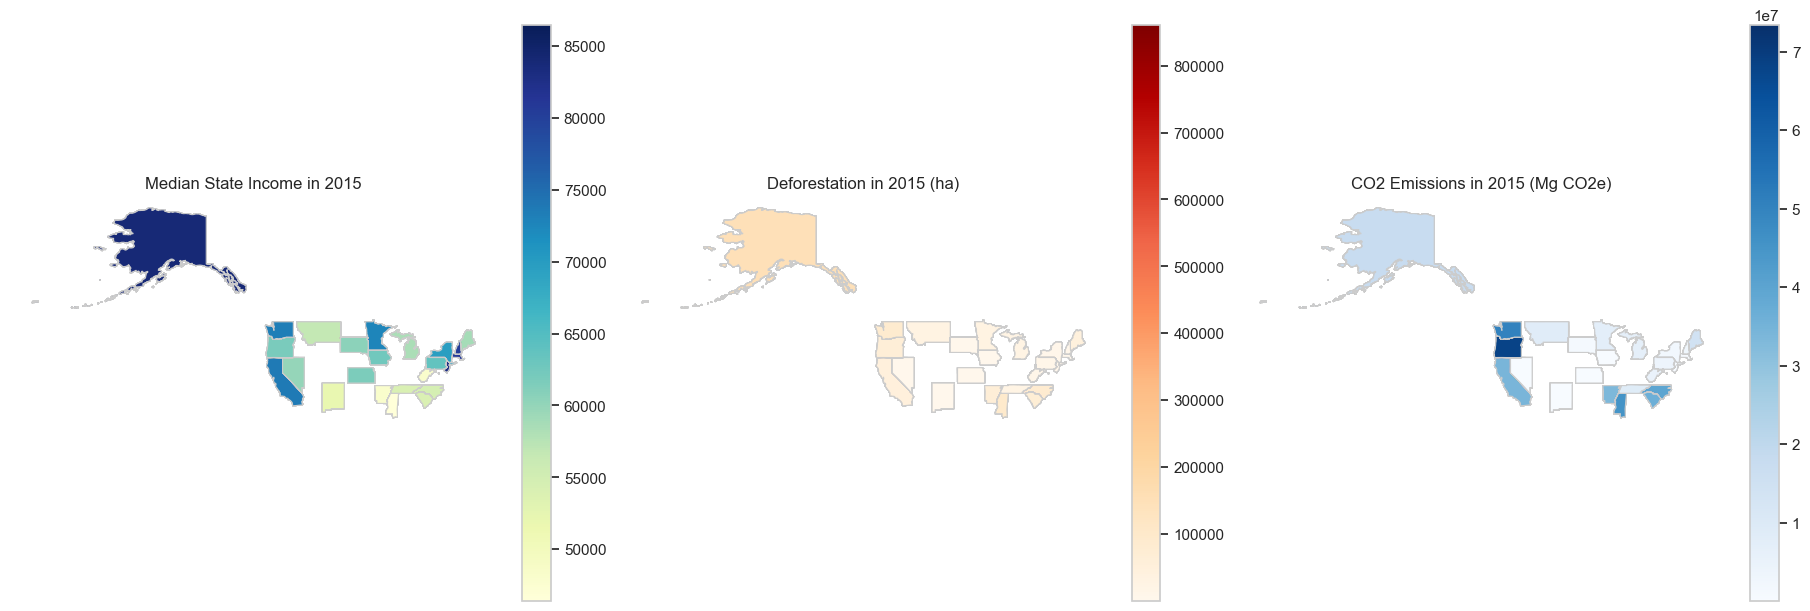

In [71]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import sqlite3

# Load U.S. states boundaries from an online GeoJSON file
us_states_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
us_states = gpd.read_file(us_states_url)

# Load data from SQLite database
db_path = '../data/analysis.db'
with sqlite3.connect(db_path) as conn:
    data_df = pd.read_sql_query("SELECT * FROM US_Analysis;", conn)

# Select data for 2015 and rename columns for clarity
data_2015 = data_df[['State', '2015', 'tc_loss_ha_2015', 'gfw_forest_carbon_gross_emissions_2015__Mg_CO2e']]
data_2015.columns = ['State', 'Income_2015', 'Deforestation_2015', 'CO2_2015']

# Merge US states GeoDataFrame with the income and environmental data on the state name
geo_data = us_states.merge(data_2015, how="left", left_on="name", right_on="State")

# Set up the figure and axis for the maps
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot Income Map
geo_data.plot(column='Income_2015', cmap='YlGnBu', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('Median State Income in 2015')
axes[0].axis('off')

# Plot Deforestation Map
geo_data.plot(column='Deforestation_2015', cmap='OrRd', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('Deforestation in 2015 (ha)')
axes[1].axis('off')

# Plot CO2 Emissions Map
geo_data.plot(column='CO2_2015', cmap='Blues', linewidth=0.8, ax=axes[2], edgecolor='0.8', legend=True)
axes[2].set_title('CO2 Emissions in 2015 (Mg CO2e)')
axes[2].axis('off')

# Display the plots
plt.show()
